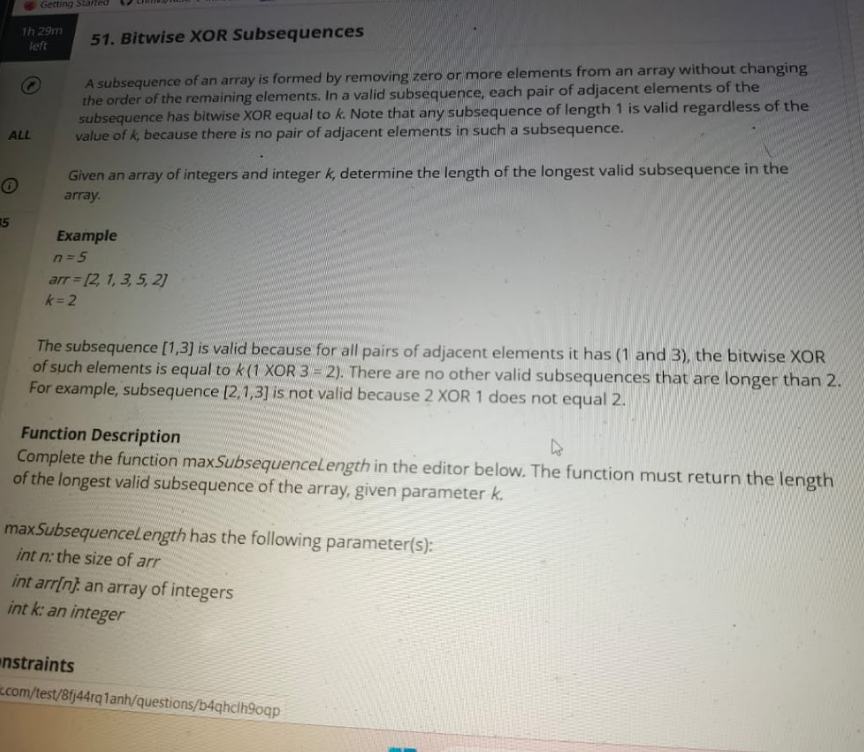

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'



/*
#include <ext/pb_ds/assoc_container.hpp>
#include <ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;

typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

*/

#define int long long
/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/

void solve(){


	int n,k;
	cin>>n;
	vector<int>arr(n);
	for(int i=0;i<n;i++){
		cin>>arr[i];
	}
	cin>>k;

	int ans=0;

	map<int,int>mp; 


	vector<int>dp(n+1,0);
	dp[0]=1;
	mp[arr[0]]=1;


	for(int i=1;i<n;i++){

		/*
		arr[i-1]^arr[i]=k
		arr[i-1]^arr[i]^arr[i]=k^arr[i];
		arr[i-1]=k^arr[i];


		*/
		dp[i]=max(dp[i],mp[arr[i]^k]+1);

		mp[arr[i]]=max(mp[arr[i]],dp[i]);

		ans=max(ans,dp[i]);


	}
	cout<<ans<<endl;

    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

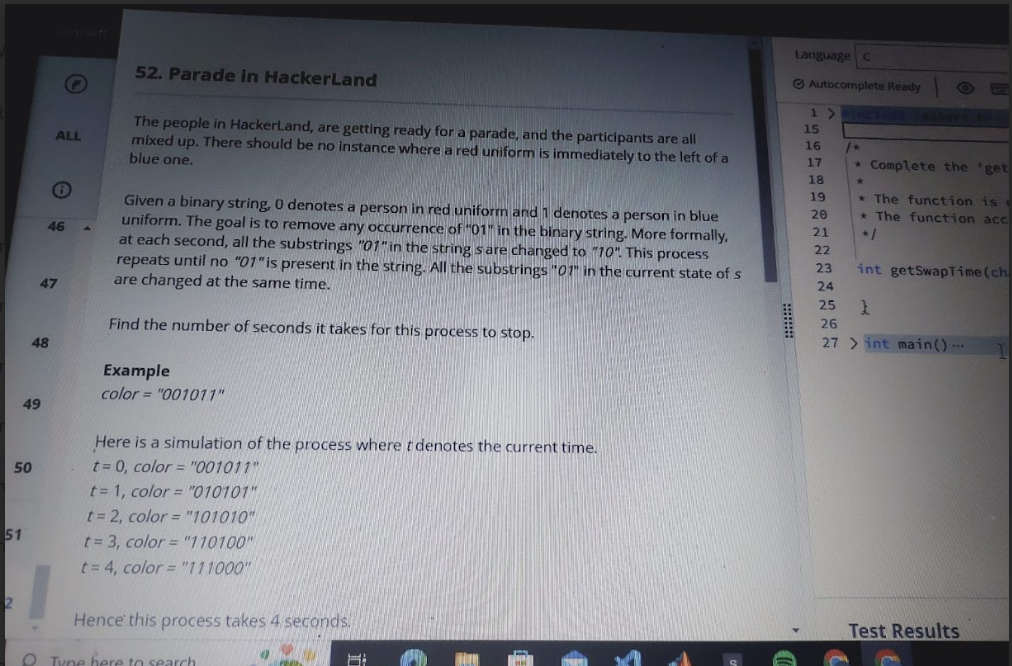


```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'



/*
#include <ext/pb_ds/assoc_container.hpp>
#include <ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;

typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

*/

#define int long long
/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/

void solve(){


	int ans=0;
	string s;
	cin>>s;


	while(true){
		string nstr="";


		bool changed=false;

		int i=0;
		while(i<s.size()){
			if(i+1<s.size() && s[i]=='0' && s[i+1]=='1'){
				nstr+='1';
				nstr+='0';
				i++;
				changed=true;
			}else{
				nstr+=s[i];
			}
			i++;

		}
		if(!changed)break;


		s=nstr;
		ans++;
	}
	cout<<ans<<endl;
    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

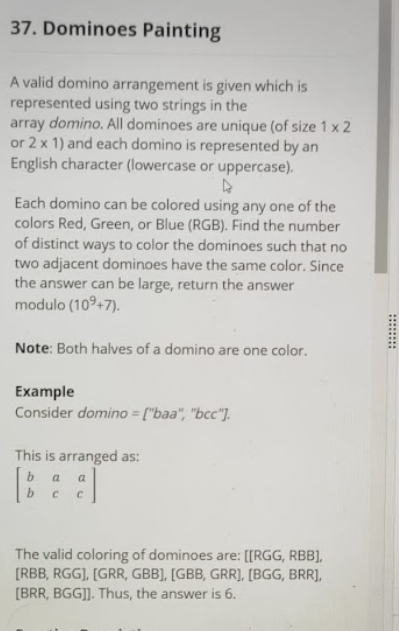

```cpp
#include <bits/stdc++.h>
using namespace std;

typedef long long LL;

const int N = 100;
const int MOD = 1e9 + 7;

char temp[2][N], s[2][N];

int main()
{
    int n;
    cin>>n;
    cin>>temp[0]>>temp[1];

    s[0][0] = temp[0][0];
    s[1][0] = temp[1][0];

    int j = 1;
    for(int i = 1; i < n; i++)
    {
        if(temp[0][i] == temp[0][i-1])
            continue;
        s[0][j] = temp[0][i];
        s[1][j] = temp[1][i];
        j++;
    }

    n = j;
    s[0][n] = s[1][n] = '\0';

    //cout<<n<<"\n"<<s[0]<<"\n"<<s[1]<<"\n";

    LL ans = (s[0][0] == s[1][0] ? 3 : 3 * 2);
    for(int i = 1; i < n; i++)
    {
        if(s[0][i] == s[1][i])
        {
            if(s[0][i-1] == s[1][i-1])
            {
                ans = (ans * 2) % MOD;
            }
            else
            {
                ans = (ans * 1) % MOD;
            }
        }
        else
        {
            if(s[0][i-1] == s[1][i-1])
            {
                ans = (ans * 2) % MOD;
            }
            else
            {
                ans = (ans * 3) % MOD;
            }
        }
    }

    cout<<ans % MOD<<"\n";
    return 0;
}


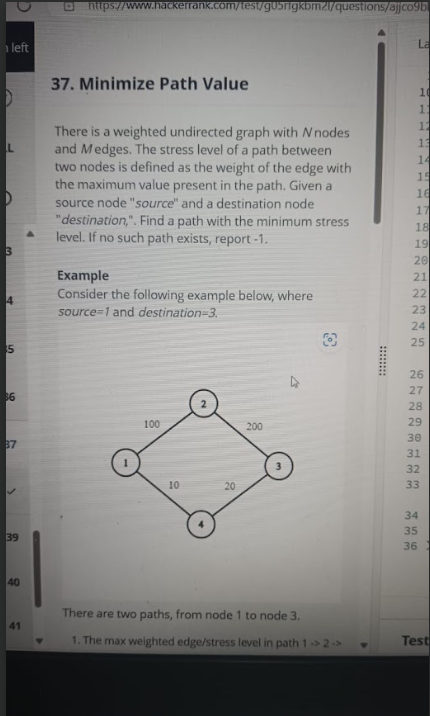

```cpp
#include <iostream>
#include <vector>
#include <queue>
#include <unordered_map>
#include <climits>

using namespace std;

// Define a pair of integers for priority queue elements
typedef pair<int, int> pii;

// Custom comparator for priority queue to make it a min-heap
struct Compare {
    bool operator()(pii const& a, pii const& b) {
        return a.first > b.first;
    }
};

// Function to find the minimum stress level path
int minStressPath(int n, int m, vector<vector<int>>& edges, int source, int destination) {
    // Initialize adjacency list where each edge is (neighbor, weight)
    vector<vector<pii>> graph(n + 1);
    for (auto& edge : edges) {
        int u = edge[0], v = edge[1], w = edge[2];
        graph[u].push_back({v, w});
        graph[v].push_back({u, w});
    }

    // Priority queue to select the path with the minimum stress level
    priority_queue<pii, vector<pii>, Compare> pq;
    pq.push({0, source});

    // Minimum stress level to each node (initialized to infinity)
    vector<int> stressLevel(n + 1, INT_MAX);
    stressLevel[source] = 0;

    while (!pq.empty()) {
        int currentStress = pq.top().first;
        int node = pq.top().second;
        pq.pop();

        if (node == destination) return currentStress;

        // Process all neighbors
        for (auto& neighbor : graph[node]) {
            int nextNode = neighbor.first;
            int edgeWeight = neighbor.second;

            // Calculate stress level as the maximum of current stress and edge weight
            int newStress = max(currentStress, edgeWeight);

            if (newStress < stressLevel[nextNode]) {
                stressLevel[nextNode] = newStress;
                pq.push({newStress, nextNode});
            }
        }
    }

    // If we reach here, there is no path from source to destination
    return -1;
}

int main() {
    int n = 5, m = 6;
    vector<vector<int>> edges = {
        {1, 2, 10},
        {2, 3, 5},
        {1, 4, 3},
        {4, 3, 2},
        {1, 5, 4},
        {5, 3, 6}
    };
    int source = 1, destination = 3;

    int result = minStressPath(n, m, edges, source, destination);
    if (result != -1)
        cout << "Minimum stress level: " << result << endl;
    else
        cout << "-1 (No path exists)" << endl;

    return 0;
}


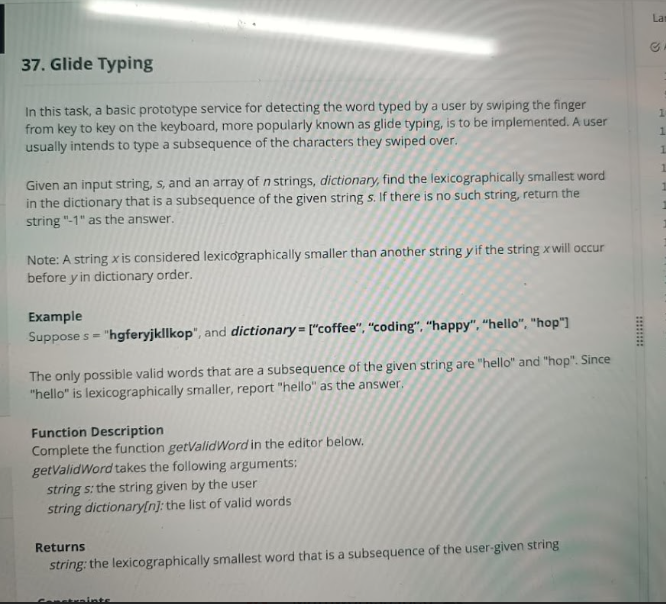

```cpp
#include <iostream>
#include <string>
#include <vector>
#include <unordered_map>
#include <limits>

using namespace std;

string find_smallest_word(const string& s, const vector<string>& words) {
    // Count the frequency of each character in the input string
    unordered_map<char, int> char_count;
    for (char ch : s) {
        char_count[ch]++;
    }

    // Initialize smallest_word as empty and set found flag to false
    string smallest_word;
    bool found = false;

    for (const string& word : words) {
        // Count the frequency of each character in the current word
        unordered_map<char, int> word_count;
        for (char ch : word) {
            word_count[ch]++;
        }

        // Check if the word can be formed with characters in s
        bool can_form = true;
        for (const auto& pair : word_count) {
            if (pair.second > char_count[pair.first]) {
                can_form = false;
                break;
            }
        }

        // Update smallest_word if it's the first valid word or lexicographically smaller
        if (can_form && (!found || word < smallest_word)) {
            smallest_word = word;
            found = true;
        }
    }

    return smallest_word;
}

// Example usage
int main() {
    string s = "abca";
    vector<string> words = {"a", "b", "c", "aa", "ab"};
    string result = find_smallest_word(s, words);
    cout << result << endl;  // Output: "a"
    return 0;
}


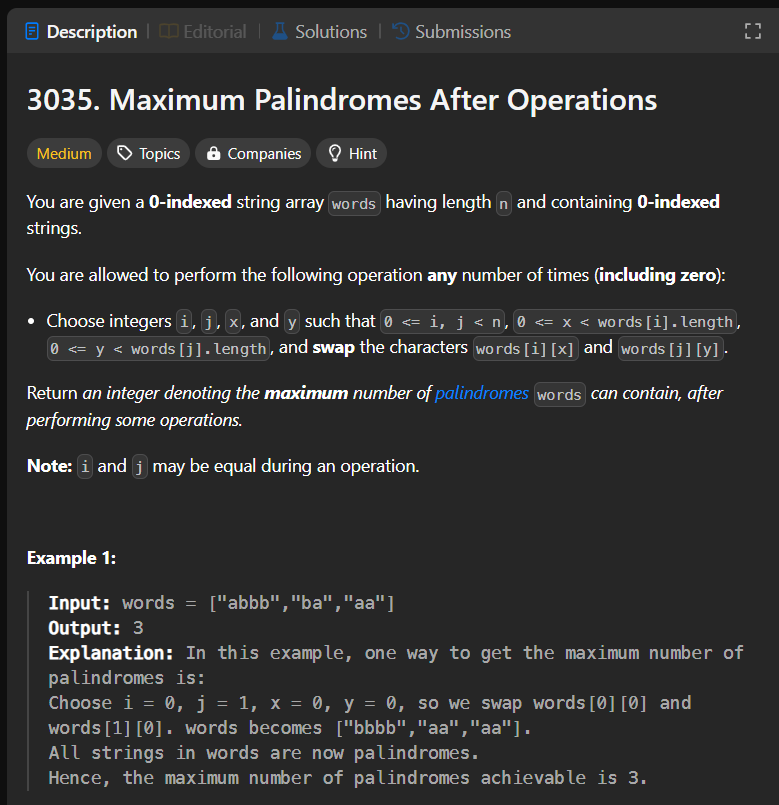

```cpp
class Solution {
public:
    int maxPalindromesAfterOperations(vector<string>& words) {


        vector<int>wordSize;
        for(auto it:words){
            wordSize.push_back(it.size());
        }
        sort(wordSize.begin(),wordSize.end());


        unordered_map<char,int>freq;
        for(auto &w:words){
            for(auto ch:w){
                freq[ch]++;
            }
        }


        int even=0,odd=0;
        for(auto &p:freq){
            even+=(p.second/2);
            odd+=(p.second%2);
        }

        int ans=0;
        for(auto it:wordSize){
            if(it&1){
                if(odd){
                    odd--;
                }else{
                    even--;
                    odd+=2;
                    odd--;
                }


            }

            if(even<(it/2))break;
            even-=(it/2);
            ans++;
        }
        return ans;


        
        
    }
};